データのクロップ

In [4]:
import os
import glob
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from random import randint
from tqdm import tqdm

In [5]:
image_path_list = sorted(glob.glob( "./new_dataset_er21046/train300/color/*"))

In [6]:
len(image_path_list)

300

In [7]:
img_size = 150
crop_size = math.floor(img_size/2)

for i in tqdm(range(len(image_path_list))):
    image_path = image_path_list[i]
    base_path = os.path.splitext(image_path)[0]
    
    # 画像
    image = cv2.imread(image_path)
    
    # Depth
    depth_path = base_path.split('/')
    depth_path[3] = "raw_depth"
    depth_path = os.path.join(*depth_path) + ".npy"
    raw_depth = np.load(depth_path)
    
    # Depth
    depth_path_01 = base_path.split('/')
    depth_path_01[3] = "csv_depth"
    depth_path_01 = os.path.join(*depth_path_01) + ".csv"
    with open(depth_path_01) as file:
        csv_depth = np.loadtxt(file, delimiter=',')
    
    # 把持位置
    grasp_info_path = base_path.split('/')
    grasp_info_path[3] = "xyz_camera" 
    grasp_info_path = os.path.join(*grasp_info_path) + ".csv"
    grasp_info = np.genfromtxt(grasp_info_path, delimiter=',')
    grasp_x  = int(grasp_info[1, 0])
    grasp_y  = int(grasp_info[1, 1])
    
    # 保存先のpath
    save_image_path = image_path.split('/')
    save_image_path[3] = 'color_crop'
    save_image_path = os.path.join(*save_image_path)

    save_depth_path = depth_path.split('/')
    save_depth_path[3] = 'raw_depth_crop'
    save_depth_path = os.path.join(*save_depth_path)

    save_depth_path_01 = depth_path_01.split('/')
    save_depth_path_01[3] = 'csv_depth_crop'
    save_depth_path_01 = os.path.join(*save_depth_path_01)
    
    # クロップ
    image = image[grasp_y-crop_size:grasp_y+crop_size, grasp_x-crop_size:grasp_x+crop_size, :]
    raw_depth = raw_depth[grasp_y-crop_size:grasp_y+crop_size, grasp_x-crop_size:grasp_x+crop_size]
    csv_depth = csv_depth[grasp_y-crop_size:grasp_y+crop_size, grasp_x-crop_size:grasp_x+crop_size]
    
    # 保存
    cv2.imwrite(save_image_path, image)
    np.save(save_depth_path, raw_depth)
    np.savetxt(save_depth_path_01, csv_depth, delimiter=',')

100%|██████████████████████████████████████████████████| 300/300 [00:41<00:00,  7.31it/s]


In [8]:
target_dir = "./new_dataset_er21046/train300/grams"

files_with_10000 = []

# 対象ディレクトリ内のすべてのファイルを処理
for file_name in os.listdir(target_dir):
    if file_name.endswith(".txt"):  # .txtファイルのみ対象
        file_path = os.path.join(target_dir, file_name)
        
        # ファイルを開いて中身をチェック
        with open(file_path, "r") as file:
            content = file.read().strip()
            
            # 中身が数字かどうか確認
            if content.isdigit() and int(content) == 0:
                files_with_10000.append(file_name)

# 結果を出力
print("数字が10000のファイル:")
for file_name in files_with_10000:
    print(file_name)

数字が10000のファイル:
2025-03-10T16-00-23.txt
2025-01-20T21-27-28.txt
2025-03-07T20-58-03.txt
2025-03-07T20-51-50.txt
2025-03-10T15-38-50.txt
2025-03-07T21-22-35.txt
2025-03-07T19-42-08.txt
2025-03-07T19-21-07.txt
2025-03-07T19-43-38.txt
2025-03-10T16-06-13.txt
2025-01-20T21-32-39.txt
2025-03-07T21-08-42.txt
2025-03-10T15-16-11.txt
2025-01-20T20-53-21.txt
2025-03-10T15-55-19.txt
2025-03-07T19-45-23.txt
2025-03-07T21-24-07.txt
2025-01-20T20-03-48.txt
2025-03-07T19-35-16.txt
2025-03-10T15-34-22.txt
2025-03-10T15-43-11.txt
2025-03-07T20-31-01.txt
2025-03-10T15-11-02.txt
2025-03-10T15-59-38.txt
2025-03-10T14-58-56.txt
2025-03-10T15-45-36.txt
2025-03-07T20-39-58.txt
2025-03-10T16-18-46.txt
2025-03-07T19-36-44.txt
2025-03-07T20-29-21.txt
2025-03-07T19-28-58.txt
2025-03-07T19-11-49.txt
2025-03-07T19-12-33.txt


データの保存

In [13]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [15]:
grams_path_list = sorted(glob.glob("./new_dataset_er21046/train300/grams/*"))

grasp_mass_list = []
for i in range(len(grams_path_list)):
    with open(grams_path_list[i]) as f:
        grasp_mass = f.read().strip()  # 改行や余分な空白を取り除く
    try:
        grasp_mass_list.append(float(grasp_mass))
    except ValueError:
        print(f"ファイル {grams_path_list[i]} の '{grasp_mass}' を float に変換できませんでした")


[3.81, 1.82, 6.17, 4.4, 4.4, 6.42, 2.06, 0.86, 3.57, 6.63, 2.58, 6.13, 6.53, 4.1, 3.58, 2.0, 4.67, 10.65, 5.65, 5.78, 3.17, 6.33, 2.55, 7.73, 1.01, 8.09, 9.14, 4.3, 8.58, 7.28, 0.0, 9.0, 4.09, 2.42, 6.6, 1.49, 4.85, 5.06, 0.9, 4.16, 2.12, 2.28, 6.75, 3.58, 7.14, 4.14, 8.41, 2.83, 3.76, 5.07, 5.5, 0.0, 2.85, 1.78, 3.22, 1.01, 2.38, 0.13, 1.63, 5.0, 1.22, 3.9, 3.74, 3.68, 6.35, 0.0, 3.41, 4.01, 0.0, 5.2, 6.43, 3.71, 11.69, 3.31, 4.28, 1.68, 5.82, 6.0, 4.0, 1.93, 1.29, 4.22, 7.85, 7.46, 5.13, 0.6, 3.94, 2.69, 4.2, 3.5, 6.87, 3.25, 4.56, 2.92, 11.23, 7.28, 5.74, 2.11, 6.16, 2.94, 5.34, 4.27, 4.13, 4.66, 4.74, 4.17, 5.25, 4.18, 1.76, 7.16, 0.0, 0.0, 2.11, 3.92, 7.9, 10000.0, 5.06, 2.77, 3.28, 3.92, 8.01, 4.38, 0.0, 3.56, 5.0, 7.77, 1.63, 0.0, 2.74, 4.28, 4.37, 5.24, 6.89, 5.32, 5.85, 0.0, 5.64, 0.0, 1.64, 4.21, 3.48, 5.2, 2.64, 1.29, 0.0, 1.38, 0.0, 0.0, 0.47, 5.07, 0.28, 5.1, 2.39, 4.47, 7.0, 0.0, 1.94, 0.0, 5.37, 3.47, 3.78, 1.06, 7.8, 0.79, 2.92, 3.34, 0.0, 1.0, 4.57, 5.43, 1.8, 3.48, 0.

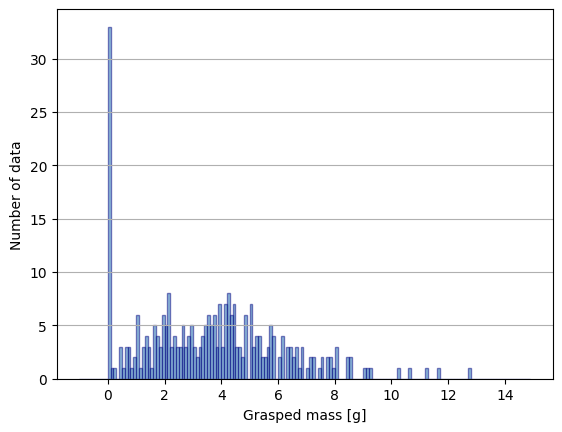

In [19]:
print(grasp_mass_list)
print("")
print(len(grasp_mass_list))
print("")
num_all   = 300

id_all   = np.random.choice(num_all, num_all, replace=False)
id_train = id_all
print(id_train)
print(type(id_train))
print("Train data")
plt.hist(np.array(grasp_mass_list)[id_train], bins=np.arange(-1, 15, 0.1), alpha=0.5, ec='navy')
plt.grid(axis='y')
plt.ylabel('Number of data')
plt.xlabel('Grasped mass [g]')
plt.show()


[3.81, 1.82, 6.17, 4.4, 4.4, 6.42, 2.06, 0.86, 3.57, 6.63, 2.58, 6.13, 6.53, 4.1, 3.58, 2.0, 4.67, 10.65, 5.65, 5.78, 3.17, 6.33, 2.55, 7.73, 1.01, 8.09, 9.14, 4.3, 8.58, 7.28, 0.0, 9.0, 4.09, 2.42, 6.6, 1.49, 4.85, 5.06, 0.9, 4.16, 2.12, 2.28, 6.75, 3.58, 7.14, 4.14, 8.41, 2.83, 3.76, 5.07, 5.5, 0.0, 2.85, 1.78, 3.22, 1.01, 2.38, 0.13, 1.63, 5.0, 1.22, 3.9, 3.74, 3.68, 6.35, 0.0, 3.41, 4.01, 0.0, 5.2, 6.43, 3.71, 11.69, 3.31, 4.28, 1.68, 5.82, 6.0, 4.0, 1.93, 1.29, 4.22, 7.85, 7.46, 5.13, 0.6, 3.94, 2.69, 4.2, 3.5, 6.87, 3.25, 4.56, 2.92, 11.23, 7.28, 5.74, 2.11, 6.16, 2.94, 5.34, 4.27, 4.13, 4.66, 4.74, 4.17, 5.25, 4.18, 1.76, 7.16, 0.0, 0.0, 2.11, 3.92, 7.9, 10000.0, 5.06, 2.77, 3.28, 3.92, 8.01, 4.38, 0.0, 3.56, 5.0, 7.77, 1.63, 0.0, 2.74, 4.28, 4.37, 5.24, 6.89, 5.32, 5.85, 0.0, 5.64, 0.0, 1.64, 4.21, 3.48, 5.2, 2.64, 1.29, 0.0, 1.38, 0.0, 0.0, 0.47, 5.07, 0.28, 5.1, 2.39, 4.47, 7.0, 0.0, 1.94, 0.0, 5.37, 3.47, 3.78, 1.06, 7.8, 0.79, 2.92, 3.34, 0.0, 1.0, 4.57, 5.43, 1.8, 3.48, 0.

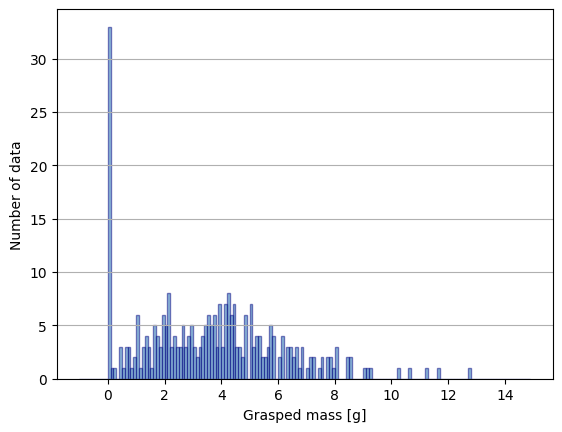

In [21]:
print(grasp_mass_list)
print("")
print(len(grasp_mass_list))
print("")
num_all   = 300

id_all   = np.random.choice(num_all, num_all, replace=False)
id_train = id_all
print(id_train)
print(type(id_train))
print("Train data")
plt.hist(np.array(grasp_mass_list)[id_train], bins=np.arange(-1, 15, 0.1), alpha=0.5, ec='navy')
plt.grid(axis='y')
plt.ylabel('Number of data')
plt.xlabel('Grasped mass [g]')
plt.show()

In [20]:
# 保存
with open('./new_dataset_er21046/train300/divide_ids/data_train_300.pickle', mode='wb') as fo:
    pickle.dump([id_train], fo)

In [22]:
# 保存
with open('./new_dataset_er21046/train300/divide_ids/data_train_300_v1.pickle', mode='wb') as fo:
    pickle.dump([id_train], fo)